##EOSC 511 
##Assignment 2, Lab2
##Tereza Jarníková


####5 problems:  
1. Problem Error
2. Problem Accuracy
3. Problem Stability
4. Problem Backward-Euler
5. Problem Taylor

####1.  Problem Error:
a) Derive the error term for the backward difference formula using Taylor series,
and hence show that it is also first order.
b) How does the constant in front of the leading order error term differ from that
for the forward difference formula? Relate this back to the results plotted in
Figure error, where these two formulae were used to derive difference schemes
for the heat conduction problem. (i.e., explain why backward euler is an
overestimate and forward euler is an underestimate of the exact solution)

#### Problem Error Solution: 

I solved this on paper and scanned my solution below:



####2. Problem Accuracy
How does changing grid spacing or order of an approximation change its accuracy?

To answer this, I plotted the three methods with 3 different step schemes: 10, 50, and 100 steps.

In [2]:
import matplotlib.pyplot as plt
plt.close('all')

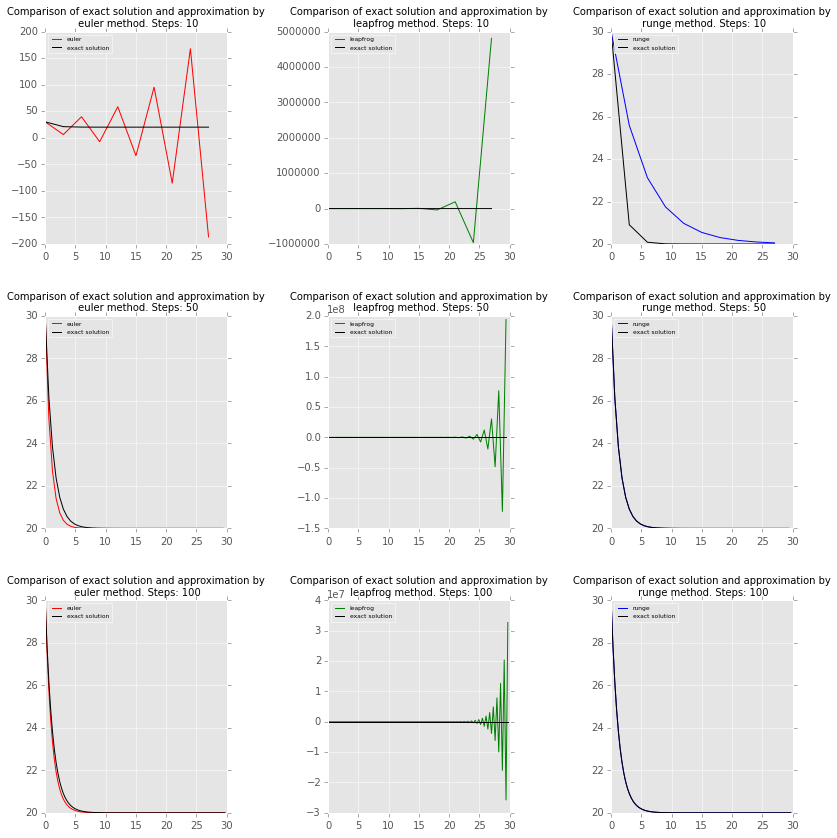

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,runge,leapfrog
import numpy as np
plt.style.use('ggplot')

theFuncs={'euler':euler,'leapfrog':leapfrog,'runge':runge}

if __name__=="__main__":
    Ta= 20
    To= 30
    tend = 30.0
    theLambda=-0.8


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this way of doing things is silly but oh well I am not that good at python
    
for i in range(1,10):
  
    ax = fig.add_subplot(3,3,i)
    if i == 1:
        funChoice = 'euler'
        npts = 10
        color = 'r'
    elif i == 2:
        funChoice = 'leapfrog'
        npts = 10
        color = 'g'
    elif i == 3:
        funChoice = 'runge'
        npts = 10
        color = 'b'    
    elif i == 4:
        funChoice = 'euler'
        npts = 50
        color = 'r'
    elif i == 5:
        funChoice = 'leapfrog'
        npts = 50
        color = 'g'
    elif i == 6:
        funChoice = 'runge'
        npts = 50
        color = 'b'
    elif i == 7:
        funChoice = 'euler'
        npts = 100
        color = 'r'
    elif i == 8:
        funChoice = 'leapfrog'
        npts = 100
        color = 'g'
    elif i == 9:
        funChoice = 'runge'
        npts = 100
        color = 'b'
        
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    exactTime=np.empty([npts,],np.float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
        exactTime[i] = tend*i/npts
        exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    ax.plot(exactTime,exactTemp,'k', label = "exact solution")
    points = str(npts)
    titl =  "Comparison of exact solution and approximation by \n " + funChoice + " method. Steps: " + points
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

Q Accuracy, part a) Does increasing the order of the scheme, or decreasing the time step always improve the solution?

A) No, not necessarily. Answering qualitatively using plot output:

Regarding order: We can see this best in a comparison of the errors produced by the approximation of the equation by the euler and leapfrog methods. Though the leapfrog method is 2nd order (while Euler is 1st order), it is less accurate than the Euler method, and "blows up" to very large values later in the approximation. In the above plot, I set no limits on the axes and allow the subplots to demonstrate the full extent of the approximation's behaviour. On the other hand, it appears to be the case that the R-K method (order 4) does improve the accuracy of the solution over the Euler method (order 1)

Regarding step size: It appears to be the case that decreasing stepsize improves the solution in these cases - in the euler and runge methods, increasing number of steps (ie decreasing stepsize) does improve the approximation, while in the leapfrog method case it at least appears to delay the onset of  instability - nevertheless the leapfrog method is not appropriate for this choice of equation, so statements about its accuracy are somewhat meaningless. However, with the Euler method, the numerical instability present at a stepsize of 3 (30/10 steps, 1st plot) vanishes at smaller step sizes, and both the Euler and the RK method's approximations appear to approach the real answer as step size decreases (the above plots are zoomable, and it becomes clear that the error present in the R-K approximation is very small and decreases with stepsize. However, computationally, it would be possible to decrease the step size to the point where round-off error would introduce a significant error in the practical calculation, so there is a point where decreasing stepsize will ruin the approximation - I tried to do this and ran out of memory. 

B) How would you calculate local truncation error? How would you calculate the global truncation error? 

The local truncation error is the error caused by in each step of the iteration. The global truncation error is caused by the accumulation of errors - ie, it is the simple difference between the true answer and the approximation at a given point. Below, I plotted the global truncation error for the R-K method for a step size of 3 (10 steps total). The local truncation error is equal to the global truncation error at the first step, and cannot be read off this graph at the other steps. To find it, one would have to find the difference of the approximation at t(i+1) and the true answer of the equation at t(i+i) using the value of the approximation at t(i) as an initial condition. (This is being done at the first timestep.)

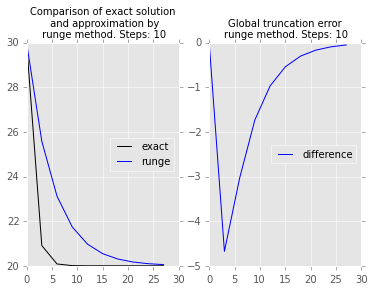

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,runge,leapfrog
import numpy as np
plt.style.use('ggplot')

To = 30 
Ta = 20

theFuncs={'euler':euler,'leapfrog':leapfrog,'runge':runge}
npts = 10;
funChoice = 'runge'
approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
for i in np.arange(0,npts):
    exactTime[i] = tend*i/npts
    exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])

plt.subplot(1, 2, 1)
plt.plot(exactTime, exactTemp, 'k', label = 'exact')
plt.hold(True)
plt.plot(approxTime, approxTemp, 'b', label = 'runge' )
points = str(npts)
titl =  "Comparison of exact solution \n and approximation by \n " + funChoice + " method. Steps: " + points
plt.title(titl, fontsize = 10)
plt.legend(loc=5,prop={'size':10})


# plt.subplot(2, 1, 1)
# plt.plot(exactTime, exactTemp, 'k')
# plt.hold(True)
# plt.plot(approxTime, approxTemp, 'b')


plt.subplot(1, 2, 2)
plt.plot(exactTime, exactTemp-approxTemp, 'b', label = 'difference')
points = str(npts)
titl =  "Global truncation error \n" + funChoice + " method. Steps: " + points
plt.title(titl, fontsize = 10)
plt.legend(loc=5,prop={'size':10})

# plt.hold(True)

plt.show()

####3. Problem Stability

In the following 3 blocks of code, I investigate the relationship between a deltaT (stepsize) and stability for the euler, leapfrog, and beuler methods. The code is set up to use a given point number, but number of points (N) and delta T are correlated via the following condition: 

   $$N_{points} =  \frac{T_{end}}{\Delta t} $$

Using a Hence, we simply choose an N so that deltaT straddles the stability condition. It is given that the stability condition for the Euler approximation scheme is 

$$ \Delta t < \frac{-2}{\lambda} $$

so for a Tend of 100 and a lambda of -8 we choose N of 399, 400, and 401

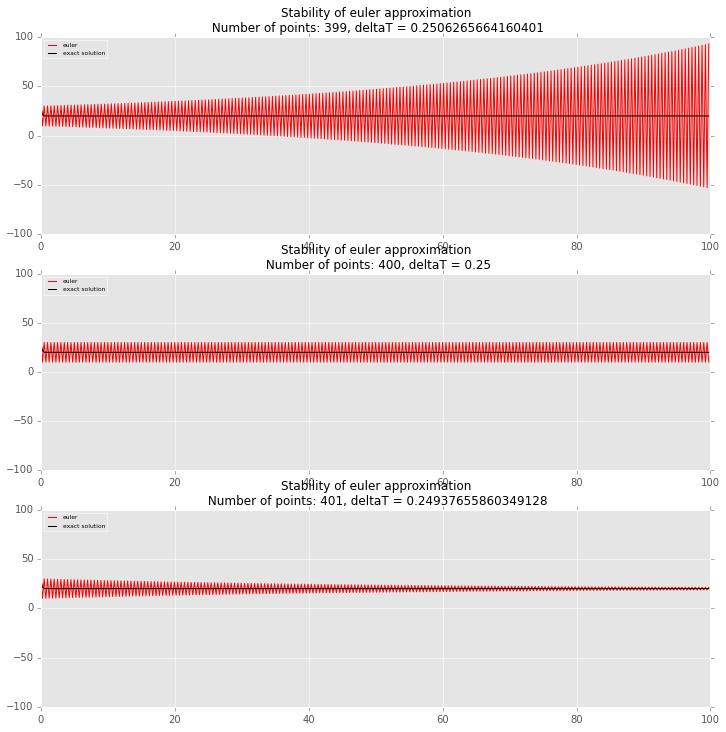

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,beuler,leapfrog
import numpy as np
plt.style.use('ggplot')

To = 30 
Ta = 20

theFuncs={'euler':euler,'leapfrog':leapfrog,'beuler':beuler}


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this is silly but oh well
    
for i in range(1,4):
  
    ax = fig.add_subplot(3,1,i)
    if i == 1:
        funChoice = 'euler'
        npts = 399
        color = 'r'
    elif i == 2:
        funChoice = 'euler'
        npts = 400
        color = 'r'
    elif i == 3:
        funChoice = 'euler'
        npts = 401
        color = 'r'    
        
    tend = 100    
    deltaT = tend /npts
    
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    ax.set_xlim([0,tend])
    ax.set_ylim([-100,100])
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    exactTime=np.empty([npts,],np.float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
        exactTime[i] = tend*i/npts
        exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    ax.plot(exactTime,exactTemp,'k', label = "exact solution")
    
    titl = "Stability of " + funChoice +" approximation \n Number of points: " + str(npts) + ", deltaT = " + str(deltaT)
    ax.set_title(titl, fontsize = 12)
    ax.legend(loc=2,prop={'size':6})
    

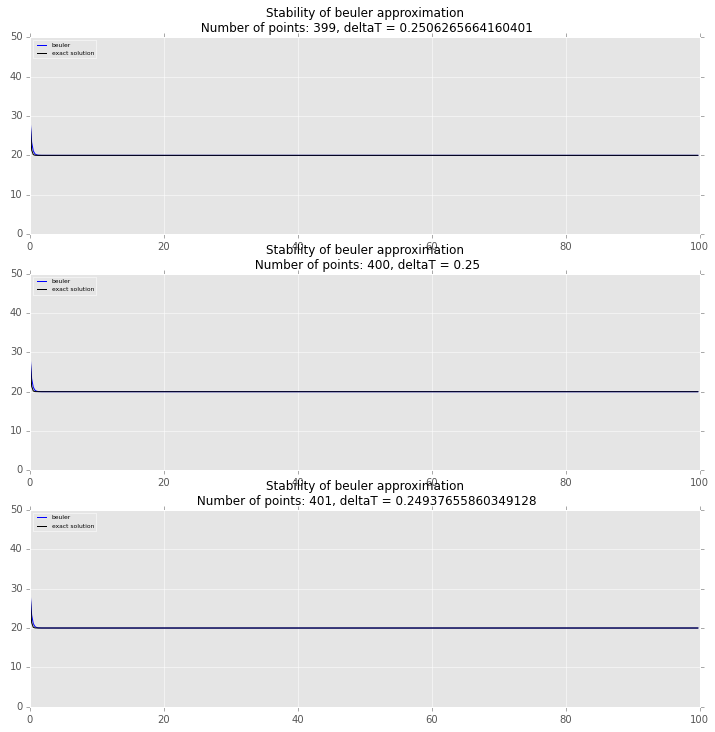

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,beuler,leapfrog
import numpy as np
plt.style.use('ggplot')

To = 30 
Ta = 20

theFuncs={'euler':euler,'leapfrog':leapfrog,'beuler':beuler}


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this is silly but oh well
    
for i in range(1,4):
  
    ax = fig.add_subplot(3,1,i)
    if i == 1:
        funChoice = 'beuler'
        npts = 399
        color = 'b'
    elif i == 2:
        funChoice = 'beuler'
        npts = 400
        color = 'b'
    elif i == 3:
        funChoice = 'beuler'
        npts = 401
        color = 'b'    
        
    tend = 100    
    deltaT = tend /npts
    
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    ax.set_xlim([0,tend])
    ax.set_ylim([0,50])
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    exactTime=np.empty([npts,],np.float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
        exactTime[i] = tend*i/npts
        exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    ax.plot(exactTime,exactTemp,'k', label = "exact solution")
    
    titl = "Stability of " + funChoice +" approximation \n Number of points: " + str(npts) + ", deltaT = " + str(deltaT)
    ax.set_title(titl, fontsize = 12)
    ax.legend(loc=2,prop={'size':6})
    

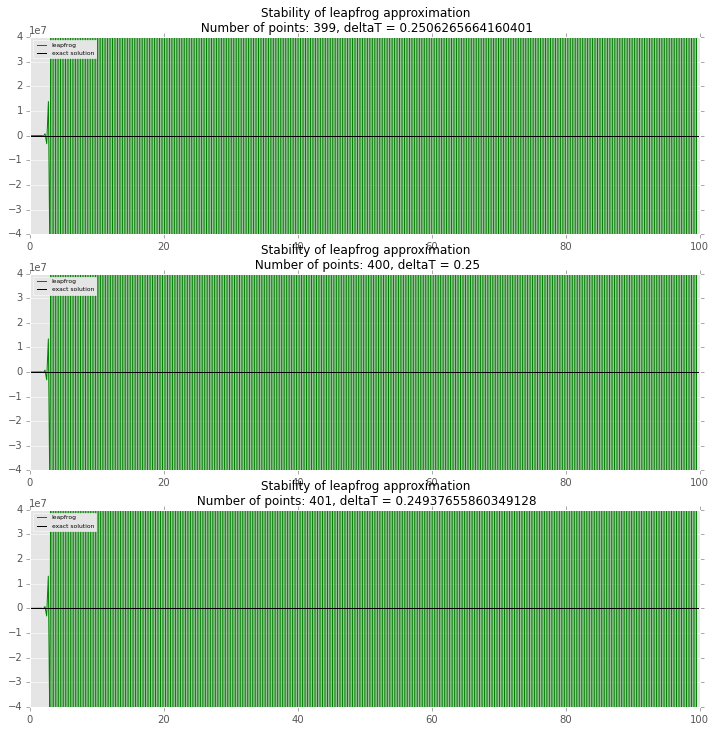

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline 
from numlabs.lab2.lab2_functions import euler,beuler,leapfrog
import numpy as np
plt.style.use('ggplot')

To = 30 
Ta = 20

theFuncs={'euler':euler,'leapfrog':leapfrog,'beuler':beuler}


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this is silly but oh well
    
for i in range(1,4):
  
    ax = fig.add_subplot(3,1,i)
    if i == 1:
        funChoice = 'leapfrog'
        npts = 399
        color = 'g'
    elif i == 2:
        funChoice = 'leapfrog'
        npts = 400
        color = 'g'
    elif i == 3:
        funChoice = 'leapfrog'
        npts = 401
        color = 'g'    

        
    tend = 100    
    deltaT = tend /npts
    
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    ax.set_xlim([0,tend])
    ax.set_ylim([-40000000,40000000])
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    exactTime=np.empty([npts,],np.float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
        exactTime[i] = tend*i/npts
        exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    ax.plot(exactTime,exactTemp,'k', label = "exact solution")
    
    titl = "Stability of " + funChoice +" approximation \n Number of points: " + str(npts) + ", deltaT = " + str(deltaT)
    ax.set_title(titl, fontsize = 12)
    ax.legend(loc=2,prop={'size':6})
    

From the above 3 plots, we see that the stability condition appears to be true only for the forward euler scheme - as predicted, we see convergence when deltaT < .25 - the backward euler scheme appears to be stable for all values of N (and therefore deltaT - we will subsequently prove why this is), while the leapfrog scheme blows up almost immediately for all values of N and deltaT. 

####Problem Euler

Apply the backward Euler formula to the test equation:
    $$\frac{dz}{dt} = \lambda z $$ 

and show that it is always stable when lambda is real and negative.


I solved this on paper and am including it here as follows:

<img src=files/asst/beuler.jpg>

####Problem Taylor

a) Use Taylor series to derive the second-order centered formula for the second derivative.
b) Derive a higher order approximation.

Answer: I wrote this down on paper and scanned - If the scans are too low quality, I have the original, it's quite legible

Strategy for a)

-Expand the Taylor series expression for f(t (i+1)) [Calling this EQUATION A]
-Expand the Taylor series expression for f(t (i-1)) [Calling this EQUATION B]
-Add them 
-Solve for f''(t(i))

Strategy for b)
-Expand the taylor series for f(t(i+2)) [EQUATION C] and for f(t(i-2)) [EQUATION D]
-add multiples of A B C and D so that f''''(t(i)) terms cancel
-this ends up being 16A + 16B  -C - D 
-solve for f''(t(i))

<img src=files/asst/taylor1.jpeg>
<img src=files/asst/taylor2.jpeg>